In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import ast
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


In [2]:
df=pd.read_csv('/kaggle/input/netflix-tv-shows-and-movies/titles.csv')
df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [3]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [5]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [6]:
df[['seasons']].fillna(1,inplace=True)
df['imdb_score'].fillna(df['imdb_score'].mean(),inplace=True)

df.isna().sum()

/tmp/ipykernel_17/3401571942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['seasons']].fillna(1,inplace=True)
/tmp/ipykernel_17/3401571942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_score'].fillna(df['imdb_score'].mean(),inplace=True)


id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score                 0
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [7]:
df.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score                 0
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [8]:
'''
Assigning new imdb_id for the missing 

'''

'\nAssigning new imdb_id for the missing \n\n'

In [9]:
new_ids=['tt{:07d}'.format(i) for i in range(1000000, 1000000 + df['imdb_id'].isnull().sum())]
df.loc[df['imdb_id'].isnull(),'imdb_id']=new_ids
print(df.isna().sum())

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                    0
imdb_score                 0
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64


In [10]:
df['imdb_votes'].fillna(0,inplace=True)
df['tmdb_score'].fillna(0,inplace=True)
df['tmdb_popularity'].fillna(0,inplace=True)
df['description']=df['description'].fillna('').str.strip()
df['description']=df['description'].replace('','NO description')
df['title']=df['title'].fillna('NO title')
df['seasons']=df['seasons'].fillna('1')
df['age_certification']=df['age_certification'].fillna('G')
print(df.isna().sum())

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


/tmp/ipykernel_17/234705865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['imdb_votes'].fillna(0,inplace=True)
/tmp/ipykernel_17/234705865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [11]:
release_year_counts=df['release_year'].value_counts()
frequent_years=release_year_counts[release_year_counts>=100].index
filt_release_years=df[df['release_year'].isin(frequent_years)]
filt_release_years_counts=filt_release_years['release_year'].value_counts()
print(filt_release_years_counts)

release_year
2019    836
2020    814
2021    787
2018    773
2017    563
2022    371
2016    362
2015    223
2014    153
2013    135
2012    107
Name: count, dtype: int64


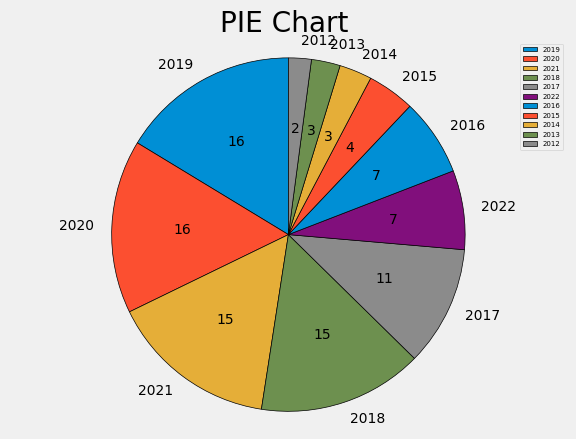

In [12]:
plt.style.use('fivethirtyeight')
labels=filt_release_years_counts.index
sizes=filt_release_years_counts.values
plt.pie(sizes,labels=labels,startangle=90,autopct='%.0f',wedgeprops={'edgecolor':'black'},textprops={'fontsize':'10'})
plt.title("PIE Chart ")
plt.legend(loc='upper right',fontsize=5)
plt.axis('equal')
plt.show()


In [13]:
'''
IMDB Score
'''

'\nIMDB Score\n'

imdb_score
6    2247
7    1577
5    1039
8     476
4     338
3     116
2      36
9      17
1       4
Name: count, dtype: int64


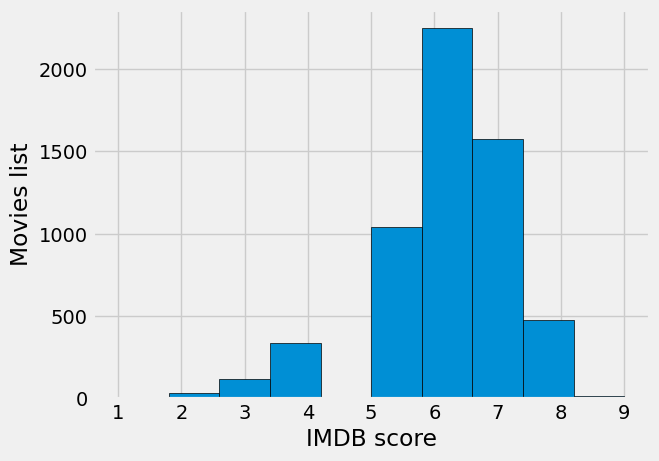

In [14]:
df['imdb_score']=df['imdb_score'].astype(int)
print(df.imdb_score.value_counts())
plt.hist(df['imdb_score'],bins=10,edgecolor='black')
plt.xlabel('IMDB score')
plt.ylabel('Movies list')
plt.show()


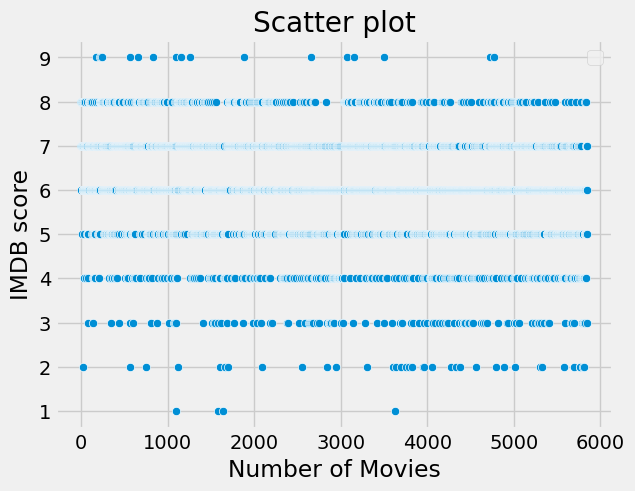

In [15]:
sns.scatterplot(data=df['imdb_score'])
plt.xlabel('Number of Movies')
plt.ylabel('IMDB score')
plt.title('Scatter plot')

plt.legend()
plt.show()

In [16]:
'''
box plot
'''

'\nbox plot\n'

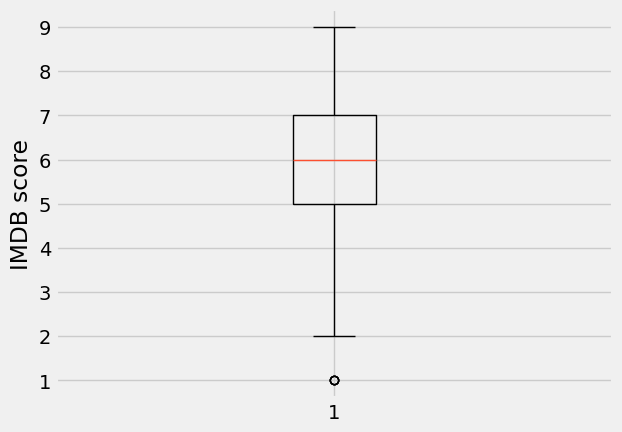

In [17]:
plt.boxplot(df['imdb_score'])
plt.ylabel('IMDB score')
plt.show()


In [18]:
'''
Top countries producing Netflix content
'''

'\nTop countries producing Netflix content\n'

In [19]:
df['production_countries'] = df['production_countries'].apply(ast.literal_eval)
df_exploded = df.explode('production_countries')
country_count = df_exploded['production_countries'].value_counts()
print(country_count)



production_countries
US         2323
IN          622
GB          404
JP          287
FR          248
           ... 
VE            1
Lebanon       1
DZ            1
BS            1
FO            1
Name: count, Length: 109, dtype: int64


production_countries
CA     219
DE     139
ES     211
FR     248
GB     404
IN     622
JP     287
KR     228
MX     126
US    2323
Name: count, dtype: int64


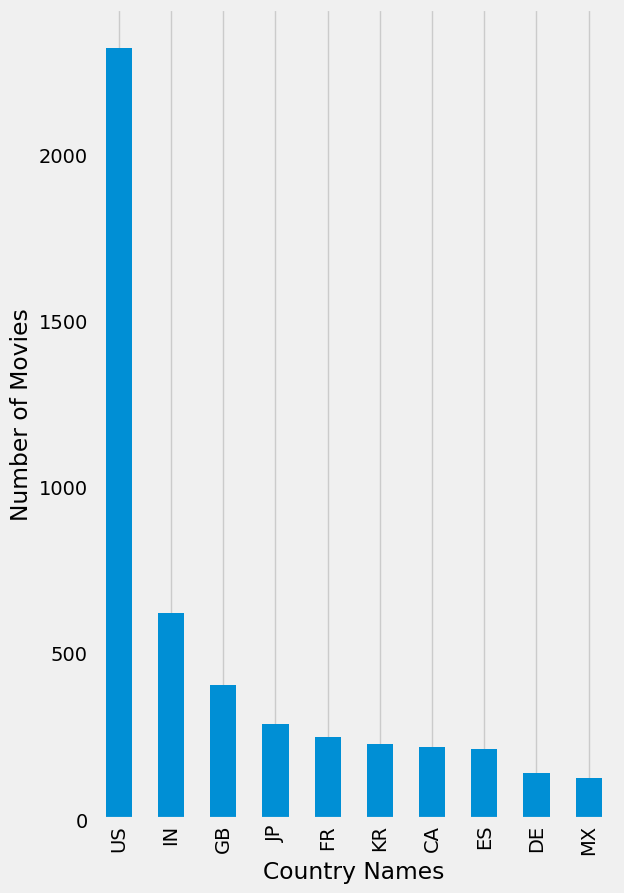

In [20]:
print(country_count.head(10).sort_index())
plt.figure(figsize=(6,10))
country_count.head(10).plot(kind='bar')
plt.xlabel("Country Names")
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()

In [21]:
'''
Genre Distribution
'''
print(df['genres'].unique())

["['documentation']" "['drama', 'crime']"
 "['drama', 'action', 'thriller', 'european']" ...
 "['drama', 'animation', 'music']" "['animation', 'family', 'scifi']"
 "['documentation', 'music', 'reality']"]


In [22]:
df['genres']=df['genres'].apply(ast.literal_eval)
genre_exploded=df.explode('genres')
genre_count=genre_exploded['genres'].value_counts()
print(genre_count)



genres
drama            2968
comedy           2325
thriller         1228
action           1157
romance           971
documentation     952
crime             936
animation         705
family            682
fantasy           630
scifi             589
european          443
horror            378
music             262
history           254
reality           234
sport             170
war               163
western            41
Name: count, dtype: int64


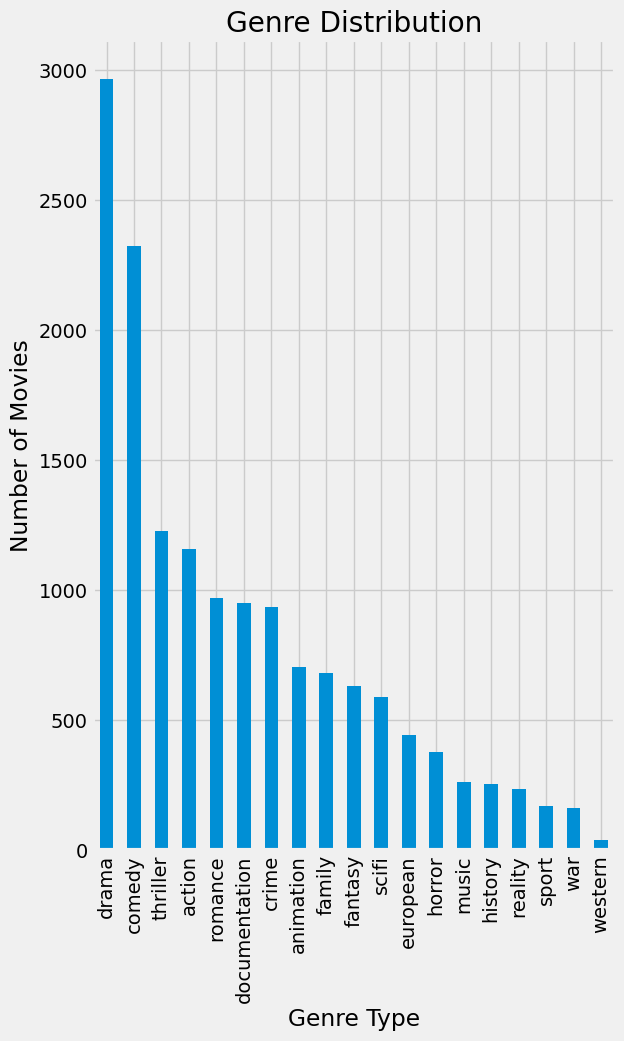

In [23]:
plt.figure(figsize=(6,10))
genre_count.plot(kind='bar')
plt.ylabel('Number of Movies')
plt.xlabel('Genre Type')
plt.title('Genre Distribution')
plt.show()


In [24]:
'''
Age certification Analysis
'''

'\nAge certification Analysis\n'

age_certification
G        2743
TV-MA     883
R         556
TV-14     474
PG-13     451
PG        233
TV-PG     188
TV-Y7     120
TV-Y      107
TV-G       79
NC-17      16
Name: count, dtype: int64


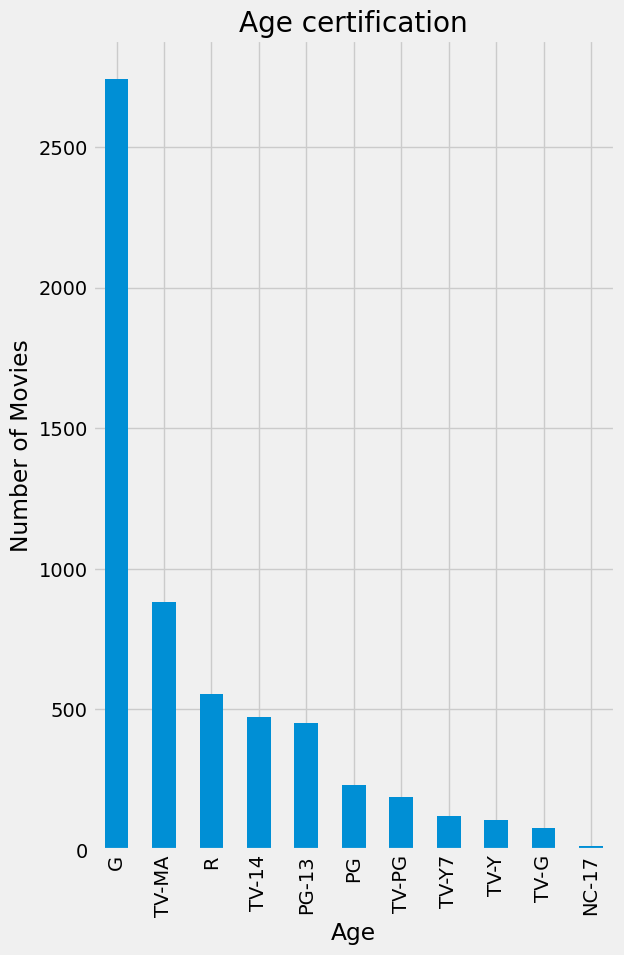

In [25]:
age_certification_counts=df['age_certification'].value_counts()
print(age_certification_counts)
plt.figure(figsize=(6,10))
age_certification_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Number of Movies')
plt.title("Age certification")
plt.show()

In [26]:
df.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1.0,tt1000000,6,0.0,0.600,0.000
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",[US],1,tt0075314,8,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",[US],1,tt0068473,7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"[fantasy, action, comedy]",[GB],1,tt0071853,8,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,G,150,"[war, action]","[GB, US]",1,tt0061578,7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"[comedy, european]",[GB],4.0,tt0063929,8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,[comedy],[GB],1,tt0079470,8,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"[thriller, action, crime]",[US],1,tt0066999,7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"[crime, drama, action]",[US],1,tt0061418,7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"[romance, action, drama]",[US],1,tt0080453,5,69844.0,50.324,6.156


In [27]:
'''
Finding correlation between imdb score and tmdb score
'''

'\nFinding correlation between imdb score and tmdb score\n'

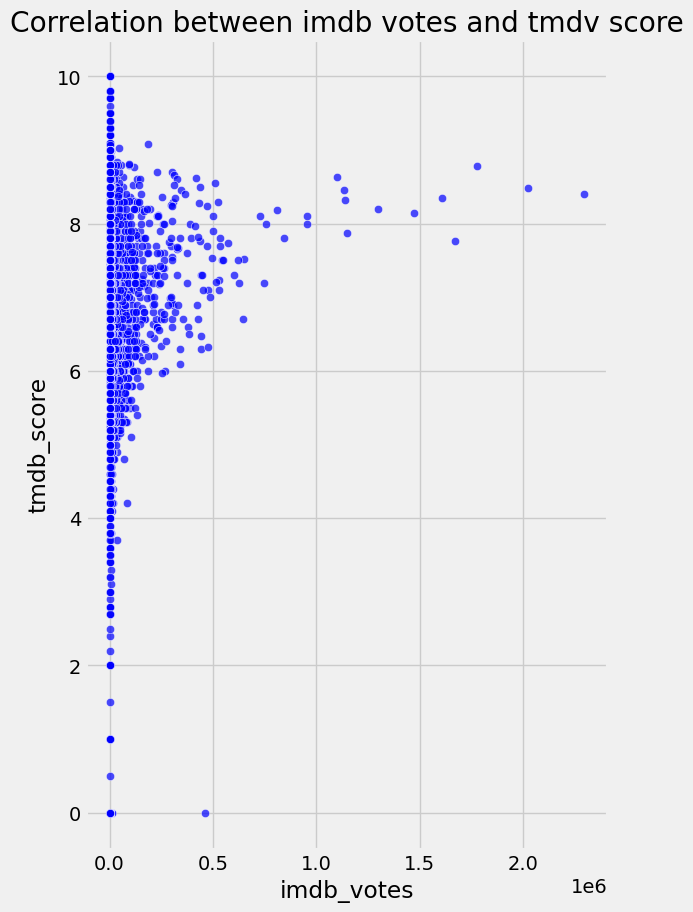

In [28]:
plt.figure(figsize=(6,10))
sns.scatterplot(data=df,x=df['imdb_votes'],y=df['tmdb_score'],color='blue',alpha=0.7)
plt.title("Correlation between imdb votes and tmdv score")
plt.show()

In [29]:
'''
Creating a heatmap
'''

'\nCreating a heatmap\n'

In [30]:
print(df.dtypes)

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                  object
imdb_id                  object
imdb_score                int64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object


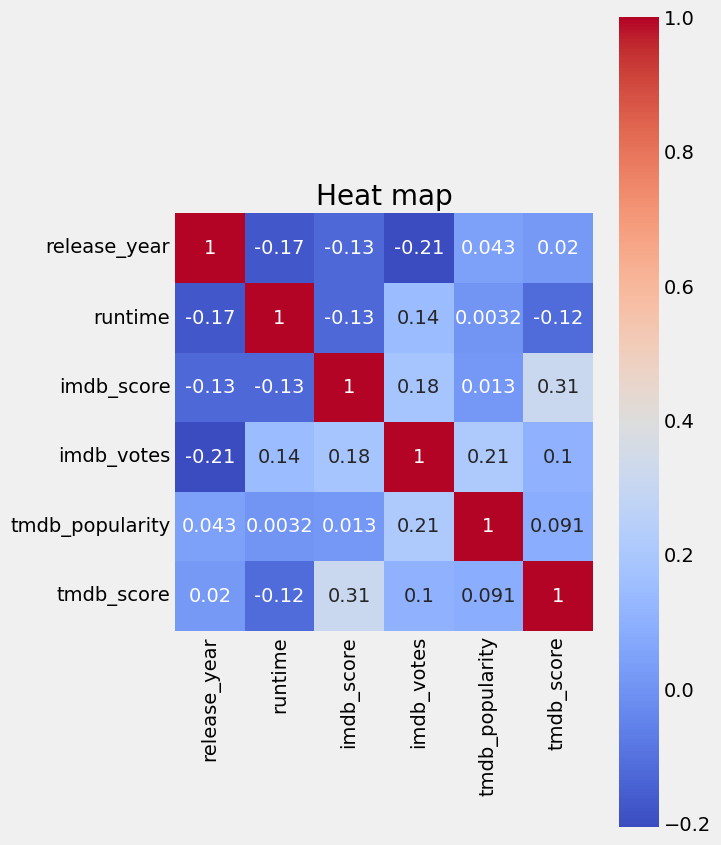

In [31]:

numeric_df=df.select_dtypes(include=['int64', 'float64'])
correlation_matrix=numeric_df.corr()
plt.figure(figsize=(6,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',square=True)
plt.title("Heat map")
plt.show()

In [32]:
df.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,[documentation],[US],1.0,tt1000000,6,0.0,0.600,0.000
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"[drama, crime]",[US],1,tt0075314,8,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"[drama, action, thriller, european]",[US],1,tt0068473,7,107673.0,10.010,7.300
